# TensorFlow MNIST Tutorial
Adapted from the TensorFlow tutorial at; https://www.tensorflow.org/get_started/mnist/beginners.

Had to download specific TensorFlow build from; https://github.com/lakshayg/tensorflow-build. <br> See https://github.com/tensorflow/tensorflow/issues/14182.

### Download MNIST data

In [1]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


### Data sizes

In [2]:
mnist.__doc__

'Datasets(train, validation, test)'

In [3]:
mnist.train.images.shape

(55000, 784)

In [4]:
mnist.validation.images.shape

(5000, 784)

In [5]:
mnist.test.images.shape

(10000, 784)

### Build model

In [6]:
import tensorflow as tf

In [7]:
x = tf.placeholder(tf.float32, [None, 784])

In [8]:
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

In [9]:
y = tf.nn.softmax(tf.matmul(x, W) + b)

In [10]:
y_ = tf.placeholder(tf.float32, [None, 10])

In [11]:
#cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

In [12]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))

In [13]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [14]:
sess = tf.InteractiveSession()

In [21]:
all_vars= tf.global_variables()

In [15]:
tf.global_variables_initializer().run()

In [16]:
for _ in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

In [17]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))

In [18]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [19]:
print(sess.run(accuracy, feed_dict = {x: mnist.test.images, y_: mnist.test.labels}))

0.9045


In [22]:
all_vars

[<tf.Variable 'Variable:0' shape=(784, 10) dtype=float32_ref>,
 <tf.Variable 'Variable_1:0' shape=(10,) dtype=float32_ref>]

In [36]:
g = tf.get_default_graph()

In [40]:
dir(g)

['_ControlDependenciesController',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_function',
 '_add_op',
 '_apply_device_functions',
 '_as_graph_def',
 '_as_graph_element_locked',
 '_attr_scope',
 '_attr_scope_map',
 '_building_function',
 '_c_graph',
 '_check_not_finalized',
 '_collections',
 '_colocation_stack',
 '_container',
 '_control_dependencies_for_inputs',
 '_control_dependencies_stack',
 '_control_flow_context',
 '_convert_stack',
 '_current_control_dependencies',
 '_default_original_op',
 '_device_function_stack',
 '_extract_frame_info',
 '_extract_stack',
 '_finalized',
 '_functions',
 '_get_control_flow_context',
 '_get_function',
 '_get_operation_b

In [32]:
sum(sess.run(W) != 0)

array([715, 715, 715, 715, 715, 715, 715, 715, 715, 715])

In [33]:
W.shape

TensorShape([Dimension(784), Dimension(10)])

In [23]:
dir(W)

['SaveSliceInfo',
 '_AsTensor',
 '_OverloadAllOperators',
 '_OverloadOperator',
 '_TensorConversionFunction',
 '__abs__',
 '__add__',
 '__and__',
 '__array_priority__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__iter__',
 '__le__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rmatmul__',
 '__rmod__',
 '__rmul__',
 '__ror__',
 '__rpow__',
 '__rsub__',
 '__rtruediv__',
 '__rxor__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__weakref__',
 '__xor__',
 '_as_graph_element',
 '_build_initializer_expr',
 '_caching_device',
 '_constraint',
 '_find_initialized_v

In [25]:
sum(W.value)

TypeError: 'method' object is not iterable

In [28]:
W.graph

In [35]:
xxx = W.eval()

In [36]:
sum(xxx)

array([  5.4502335, -17.277296 ,   6.686717 ,   5.1415725,  -6.5557055,
         6.591618 ,   1.0964351,  -2.2125902,   7.628777 ,  -6.5497904],
      dtype=float32)

In [37]:
import matplotlib.pyplot as plt

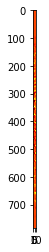

In [38]:
plt.imshow(xxx, cmap='hot', interpolation='nearest')
plt.show()

In [39]:
xxx.shape

(784, 10)

In [41]:
import numpy as np

In [42]:
a = np.zeros((10, 2))
a

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [43]:
a = np.arange(6).reshape((3, 2))
a

array([[0, 1],
       [2, 3],
       [4, 5]])

In [44]:
np.arange(6)

array([0, 1, 2, 3, 4, 5])